## Import required libraries

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
import xgboost as xgb 
%matplotlib inline

## EDA

In [140]:
df = pd.read_csv('../datasets/creditcard.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
# Display basic dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  fl

In [141]:
# Display the first few rows
print("First 5 Rows:")
print(df.head(1))

First 5 Rows:
   time        v1        v2        v3        v4        v5        v6        v7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         v8        v9  ...       v21       v22       v23       v24       v25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   

        v26       v27       v28  amount  class  
0 -0.189115  0.133558 -0.021053  149.62      0  

[1 rows x 31 columns]


In [142]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
# Summary statistics of stock prices
print("Statistic Values:")
df.describe()

Missing Values:
time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64
Statistic Values:


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [143]:
df.duplicated().sum()

np.int64(1081)

In [144]:
df=df.drop_duplicates()

In [145]:
class_counts = df['class'].value_counts()
class_counts

class
0    283253
1       473
Name: count, dtype: int64

### Distribution of Transaction Amount 

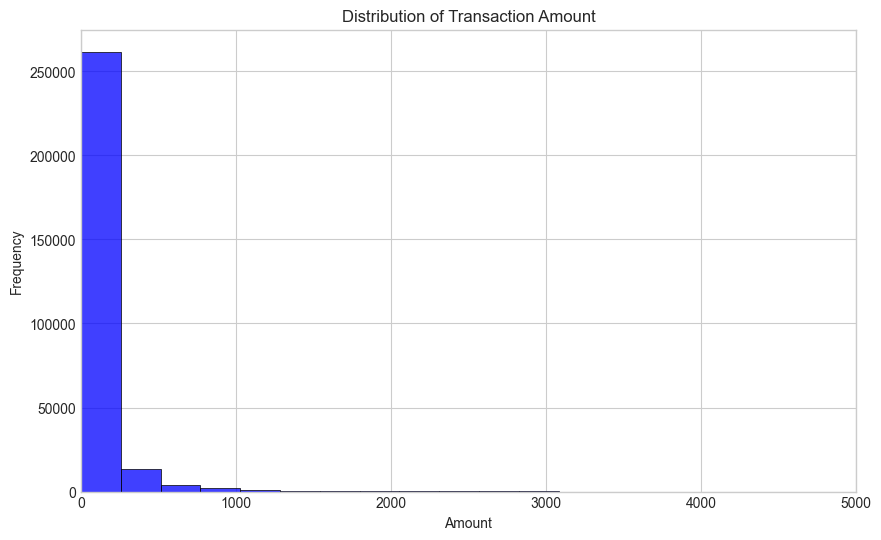

In [146]:

plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=100, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0, 5000)
plt.show()

### Amount Distribution by Class

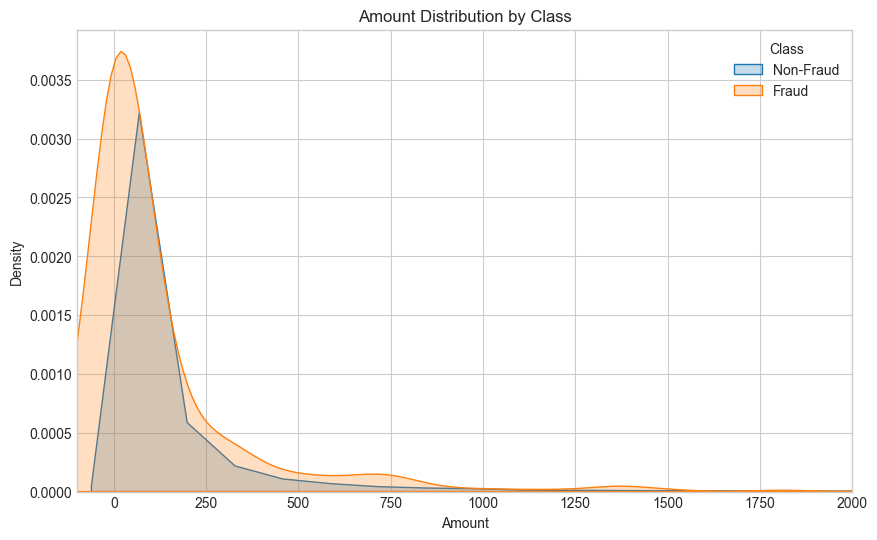

In [147]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['class'] == 0]['amount'], label='Non-Fraud', fill=True)
sns.kdeplot(df[df['class'] == 1]['amount'], label='Fraud', fill=True)
plt.title('Amount Distribution by Class')
plt.xlabel('Amount')
plt.xlim(-100, 2000)
plt.legend(title='Class')
plt.show()

## Split the dataset

In [148]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)  
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

X_train = df_train.drop('class', axis=1)
X_val = df_val.drop('class', axis=1)
X_test = df_test.drop('class', axis=1)

y_train = df_train['class']
y_val = df_val['class']
y_test = df_test['class']

del df_train['class']
del df_val['class']
del df_test['class']



In [149]:
X_train.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount'],
      dtype='object')

## Apply scaling

In [150]:
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [151]:
X_train

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,70789.0,0.331303,-1.083723,-0.205618,1.681259,-0.866115,-1.128508,0.937822,-0.309026,-0.068569,...,0.664203,-0.112173,-1.491316,-0.194775,0.631496,0.121401,-0.792289,-0.095636,0.103991,465.00
1,78888.0,-2.998415,2.345921,0.676028,0.297820,0.963336,-1.023965,-2.571801,-3.135067,0.113607,...,0.855030,-0.385840,0.419201,-2.385350,0.635952,-0.443341,-0.485313,0.357250,0.315491,6.01
2,140738.0,2.107015,0.079102,-2.078755,0.083840,0.379860,-1.844425,0.816489,-0.611998,0.244466,...,-0.238046,0.153164,0.550496,-0.048530,0.098628,0.423227,0.237399,-0.090218,-0.077090,16.37
3,52983.0,0.900483,-0.179019,0.264297,1.496151,-0.216314,-0.110581,0.298420,-0.090766,0.167488,...,0.135031,-0.010828,-0.071663,-0.192167,0.115813,0.637604,-0.329488,0.018578,0.041414,145.67
4,66237.0,-0.898975,1.010535,1.217815,2.810175,0.461901,0.155427,2.216271,-0.456804,-2.006517,...,-0.190294,0.036636,0.213169,-0.091689,0.401559,0.242147,-0.111182,-0.181701,-0.302437,239.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170230,66024.0,-0.837262,1.386247,1.271542,2.915289,0.271627,0.083552,0.093877,0.452096,-1.490273,...,0.340385,-0.102682,-0.248335,-0.056727,-0.089647,-0.285931,0.071171,0.297953,0.101114,6.02
170231,140804.0,-2.784078,-2.827255,-0.815177,-0.453503,6.522890,1.150266,-1.966590,1.196252,-0.388152,...,0.974141,0.000009,-1.112437,0.570410,0.600048,-0.013847,0.312110,-0.041478,0.206862,0.89
170232,76552.0,-0.690184,0.666139,3.044665,0.649202,-0.289976,0.313867,0.349955,0.063024,0.194544,...,0.032457,-0.003742,0.350356,-0.253937,0.405016,0.198475,-0.395969,-0.034999,-0.136021,12.99
170233,36587.0,-3.669883,-2.139424,-1.484985,0.016833,-0.655260,-0.620690,1.444137,0.244819,-0.317681,...,-0.142656,-0.007764,-0.099469,-0.618232,-0.216701,-0.461477,0.869934,0.674782,-0.807877,598.00


In [152]:
X_train_scaled

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,-0.506623,0.168452,-0.652286,-0.139550,1.189787,-0.636065,-0.851115,0.773142,-0.267966,-0.062105,...,0.870404,-0.158210,-2.054027,-0.305563,1.040967,0.233461,-1.641347,-0.253767,0.315171,1.518544
1,-0.335961,-1.541708,1.422954,0.444908,0.213690,0.702453,-0.772303,-2.125741,-2.711209,0.104221,...,1.120865,-0.538095,0.576569,-3.736194,1.048306,-0.847861,-1.005556,0.924042,0.959251,-0.333054
2,0.967341,1.080467,0.051327,-1.381283,0.062714,0.275553,-1.390823,0.672923,-0.529899,0.223694,...,-0.313806,0.210111,0.757350,-0.076529,0.163315,0.811372,0.491280,-0.239677,-0.236272,-0.291261
3,-0.881830,0.460786,-0.104860,0.171964,1.059183,-0.160638,-0.083731,0.245008,-0.079270,0.153414,...,0.175860,-0.017531,-0.099304,-0.301478,0.191619,1.221844,-0.682822,0.043267,0.124605,0.230344
4,-0.602542,-0.463425,0.614927,0.804066,1.986304,0.335578,0.116805,1.829117,-0.395727,-1.831442,...,-0.251131,0.048355,0.292883,-0.144121,0.662253,0.464655,-0.230680,-0.477593,-0.922520,0.606844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170230,-0.607031,-0.431729,0.842266,0.839683,2.060468,0.196364,0.062621,0.076059,0.390060,-1.360114,...,0.445390,-0.145036,-0.342563,-0.089366,-0.146780,-0.546464,0.146998,0.769831,0.306410,-0.333014
170231,0.968731,-1.431624,-1.707278,-0.543637,-0.316413,4.770103,0.866784,-1.625848,1.033418,-0.353883,...,1.277200,-0.002488,-1.532348,0.892784,0.989172,-0.025500,0.646017,-0.112919,0.628443,-0.353709
170232,-0.385185,-0.356189,0.406537,2.015115,0.461610,-0.214532,0.236249,0.287575,0.053689,0.178116,...,0.041231,-0.007695,0.481777,-0.398216,0.667947,0.381036,-0.820513,-0.096070,-0.415734,-0.304896
170233,-1.227326,-1.886578,-1.291079,-0.987663,0.015437,-0.481793,-0.468286,1.191349,0.210859,-0.289543,...,-0.188606,-0.013278,-0.137589,-0.968733,-0.356044,-0.882587,1.801345,1.749839,-2.461734,2.055076


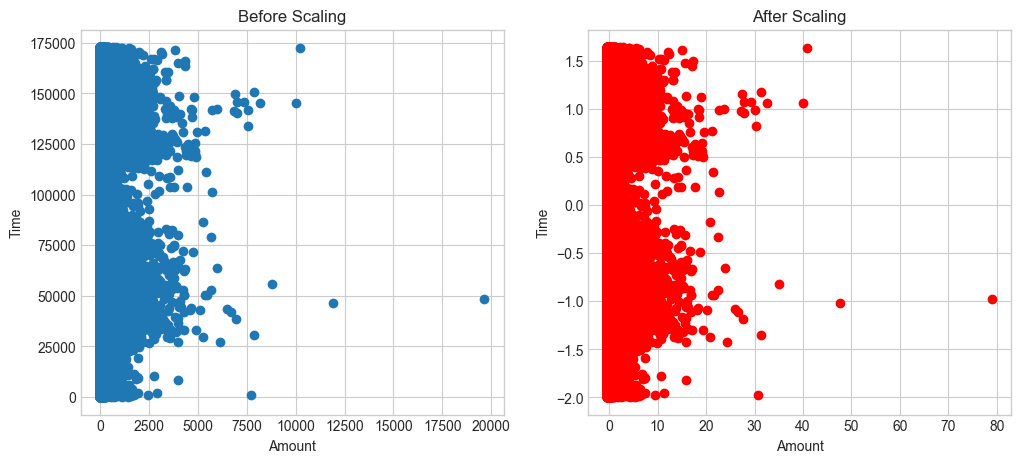

In [153]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['amount'], X_train['time'])
ax1.set_xlabel("Amount")
ax1.set_ylabel("Time")
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['amount'], X_train_scaled['time'],color='red')
ax2.set_xlabel("Amount")
ax2.set_ylabel("Time")
ax2.set_title("After Scaling")
plt.show()

## Class imbalance

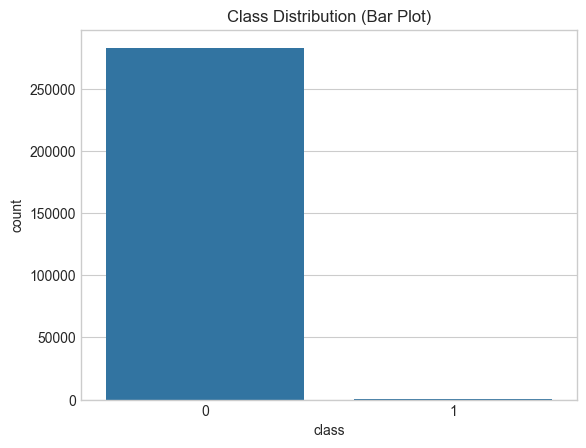

In [154]:
sns.countplot(x=df['class'])
plt.title("Class Distribution (Bar Plot)")
plt.show()

Original training dataset shape: Counter({0: 169956, 1: 279})
Resampled training dataset shape: Counter({0: 169956, 1: 169956})

Visualizing the balanced training data:


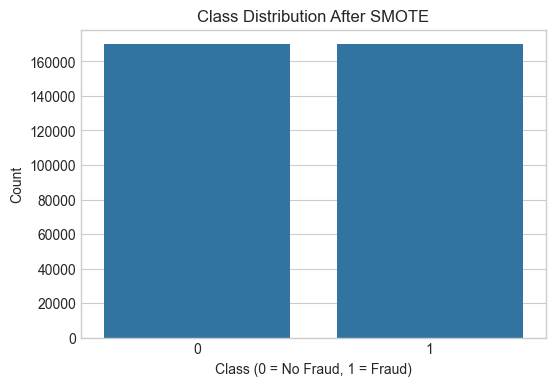

In [155]:
# We use 'y_train' to see the shape before balancing
print(f"Original training dataset shape: {Counter(y_train)}")

# Define SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to scaled training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Show the new, balanced shape
print(f"Resampled training dataset shape: {Counter(y_train_resampled)}")

# Visualize the new balanced data 
print("\nVisualizing the balanced training data:")
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class (0 = No Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

## Train XGB model

In [156]:
features= X_train.columns.astype(str).tolist()
dtrain = xgb.DMatrix(X_train.values, label=y_train, feature_names=features)
dval   = xgb.DMatrix(X_val.values,   label=y_val, feature_names=features)
dtest  = xgb.DMatrix(X_test.values,  feature_names=features)

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [157]:
evals_result = {}
scores = []
for depth in [2, 3, 6]:
    for eta in [0.01, 0.1, 0.5]:
        xgb_params = {
        'eta': eta, 
        'max_depth': depth,
        'min_child_weight': 1,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
        }
        print(f"Starting training with eta as {eta} and max_depth as {depth}")
        model = xgb.train (xgb_params,
                    dtrain, 
                    num_boost_round=200,
                    evals=watchlist,
                    verbose_eval=False,
                    evals_result=evals_result)
        y_pred = model.predict(dval)
        auc = roc_auc_score(y_val, y_pred)
        scores.append((depth, eta, auc))
        print(f"Finished training \nAUC score is {auc}\n")
        print('-'*50)

columns = ['max_depth', 'eta', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

Starting training with eta as 0.01 and max_depth as 2
Finished training 
AUC score is 0.9752138767506243

--------------------------------------------------
Starting training with eta as 0.1 and max_depth as 2
Finished training 
AUC score is 0.984121736570639

--------------------------------------------------
Starting training with eta as 0.5 and max_depth as 2
Finished training 
AUC score is 0.4971750414915781

--------------------------------------------------
Starting training with eta as 0.01 and max_depth as 3
Finished training 
AUC score is 0.9767000326388313

--------------------------------------------------
Starting training with eta as 0.1 and max_depth as 3
Finished training 
AUC score is 0.9757332433922867

--------------------------------------------------
Starting training with eta as 0.5 and max_depth as 3
Finished training 
AUC score is 0.821750645928743

--------------------------------------------------
Starting training with eta as 0.01 and max_depth as 6
Finished t

In [158]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,eta,auc
1,2,0.10,0.984122
6,6,0.01,0.978449
3,3,0.01,0.976700
4,3,0.10,0.975733
0,2,0.01,0.975214
7,6,0.10,0.974321
8,6,0.50,0.909024
5,3,0.50,0.821751
2,2,0.50,0.497175


AUC score is better when eta is 0.10 and max_depth is 2